# Set up

In [10]:
# Install packages as needed
!pip install geopandas
!pip install geotext
!pip install numpy geotext
!pip install matplotlib
!pip install urllib #error
!pip install geopy
!pip install shapely
!pip install descartes
!pip install nltk

ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [11]:
# Importing all the libraries we'll use
import geopandas as gpd
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import urllib.request#new
import descartes

from urllib import request
from geotext import GeoText
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from shapely.geometry import Point, Polygon

# Reading texts

In [12]:
url = 'http://www.gutenberg.org/files/3176/3176-0.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(f'{type(raw)}, \n{len(raw)}, \n{raw[:501]}')

<class 'str'>, 
1145406, 
﻿Project Gutenberg's The Innocents Abroad, by Mark Twain (Samuel Clemens)

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: The Innocents Abroad

Author: Mark Twain (Samuel Clemens)

Release Date: August 18, 2006 [EBook #3176]
Last Updated: February 23, 2018

Language: English


# Geoparsing

In [13]:
places = GeoText(raw)
cities = list(places.cities)
cities

['Tangier',
 'Paris',
 'Temple',
 'Como',
 'Garibaldi',
 'Rome',
 'Roman',
 'Naples',
 'Naples',
 'Bay',
 'Smyrna',
 'Ferguson',
 'Jacksonville',
 'Jericho',
 'Fountain',
 'Paradise',
 'Damascus',
 'George',
 'Pen',
 'Palestine',
 'Tiberias',
 'Nazareth',
 'Godfrey',
 'David',
 'Jericho',
 'Bethany',
 'March',
 'Palestine',
 'Holiday',
 'San Francisco',
 'New York',
 'New York',
 'York',
 'Paris',
 'Genoa',
 'Genoa',
 'Columbus',
 'Verona',
 'Venice',
 'Parma',
 'Correggio',
 'Bologna',
 'Florence',
 'Florence',
 'Pisa',
 'Lucca',
 'Roman',
 'Florence',
 'Naples',
 'Rome',
 'Garibaldi',
 'Rome',
 'Naples',
 'Palermo',
 'Naples',
 'Athens',
 'Messina',
 'Piraeus',
 'Athens',
 'Bay',
 'Corinth',
 'Athens',
 'Balaklava',
 'Troy',
 'Asia',
 'Smyrna',
 'Asia',
 'Beirut',
 'Damascus',
 'Jerusalem',
 'Tiberias',
 'Nazareth',
 'Bethany',
 'Bethlehem',
 'Beirut',
 'Damascus',
 'Tiberias',
 'Alexandria',
 'Alexandria',
 'Cairo',
 'Memphis',
 'Cagliari',
 'Palma',
 'Parma',
 'Valencia',
 'Duncan'

In [15]:
geolocator = Nominatim(user_agent='zhenliu26@outlook.com', timeout=2) # requires your e-mail address to track usage. Timeout set for 2 seconds.

lat_lon = []
for city in cities:
  try:
    location = geolocator.geocode(city)
    if location:
      # If you want to see only lat/lon as they process you can include the following code here but I found it added a lot of time to the operation: print(location.latitude, location.longitude)
      lat_lon.append(location)
  except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s">
          (city, e))
lat_lon

[Location(Tanger طنجة, Tanger ⵜⵉⵏ ⵉⴳⴳⵉ طنجة, pachalik de Tanger طنجة, Préfecture de Tanger-Assilah عمالة طنجة-أصيلة, Tanger-Tétouan-Al Hoceima ⵟⴰⵏⵊ-ⵟⵉⵜⴰⵡⵉⵏ-ⵍⵃⵓⵙⵉⵎⴰ طنجة تطوان الحسيمة, Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب, (35.777103, -5.803792, 0.0)),
 Location(Paris, Île-de-France, France métropolitaine, France, (48.8566969, 2.3514616, 0.0)),
 Location(Temple, Bell County, Texas, United States, (31.098207, -97.3427847, 0.0)),
 Location(Como, Lombardia, Italia, (45.939475900000005, 9.149410145408947, 0.0)),
 Location(Garibaldi, Região Geográfica Imediata de Bento Gonçalves, Região Geográfica Intermediária de Caxias do Sul, Rio Grande do Sul, Região Sul, 95720-000, Brasil, (-29.2562253, -51.5269167, 0.0)),
 Location(Roma, Roma Capitale, Lazio, Italia, (41.8933203, 12.4829321, 0.0)),
 Location(Roman, Mesnils-sur-Iton, Bernay, Eure, Normandie, France métropolitaine, 27240, France, (48.836297599999995, 1.047626206618487, 0.0)),
 Location(Napoli, Campania, Italia, (40.8359336, 14.2487826, 0.0)),
 Locati

In [16]:
# put it into pandas dataframe
df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
df.head(7)

,City Name,Coordinates
0,"Tanger طنجة, Tanger ⵜⵉⵏ ⵉⴳⴳⵉ طنجة, pachalik de...","(35.777103, -5.803792)"
1,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)"
2,"Temple, Bell County, Texas, United States","(31.098207, -97.3427847)"
3,"Como, Lombardia, Italia","(45.939475900000005, 9.149410145408947)"
4,"Garibaldi, Região Geográfica Imediata de Bento...","(-29.2562253, -51.5269167)"
5,"Roma, Roma Capitale, Lazio, Italia","(41.8933203, 12.4829321)"
6,"Roman, Mesnils-sur-Iton, Bernay, Eure, Normand...","(48.836297599999995, 1.047626206618487)"


In [17]:
# convert the tuples to Point class
geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
geometry[:7]

In [18]:
# coordinate system we're using
crs = {'init': 'epsg:4326'}

# convert df to geo df
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,City Name,Coordinates,geometry
0,"Tanger طنجة, Tanger ⵜⵉⵏ ⵉⴳⴳⵉ طنجة, pachalik de...","(35.777103, -5.803792)",POINT (-5.80379 35.77710)
1,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)",POINT (2.35146 48.85670)
2,"Temple, Bell County, Texas, United States","(31.098207, -97.3427847)",POINT (-97.34278 31.09821)
3,"Como, Lombardia, Italia","(45.939475900000005, 9.149410145408947)",POINT (9.14941 45.93948)
4,"Garibaldi, Região Geográfica Imediata de Bento...","(-29.2562253, -51.5269167)",POINT (-51.52692 -29.25623)


# Plotting the data

In [19]:
# Upload local script to Colab - running this creates a "choose file" button to upload local files.
# .shp file downloaded from https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1
from google.colab import files
uploaded = files.upload()

Saving Countries_WGS84.cpg to Countries_WGS84.cpg
Saving Countries_WGS84.dbf to Countries_WGS84.dbf
Saving Countries_WGS84.prj to Countries_WGS84.prj
Saving Countries_WGS84.shp to Countries_WGS84.shp
Saving Countries_WGS84.shx to Countries_WGS84.shx


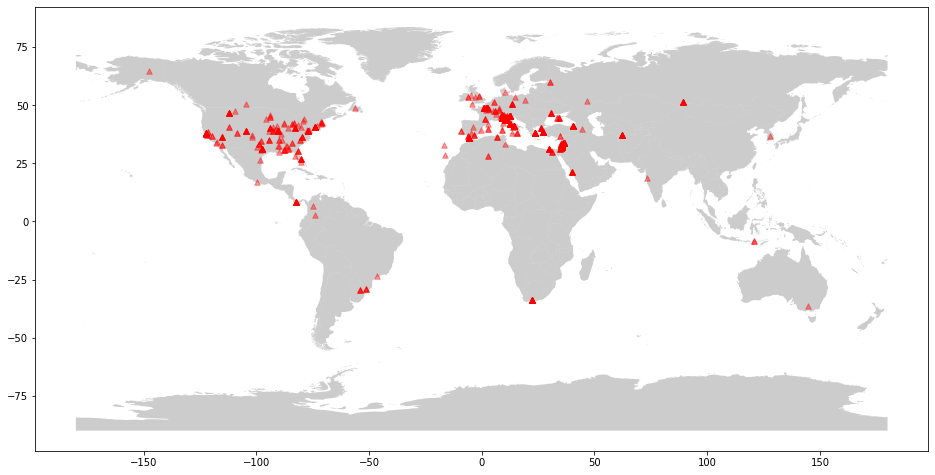

In [20]:
# world map .shp file we down/uploaded
countries_map = gpd.read_file('Countries_WGS84.shp')

f, ax = plt.subplots(figsize=(16, 16))
countries_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'r', marker = '^', alpha=.4)

# Further analysis

## Plotting Word Frequency

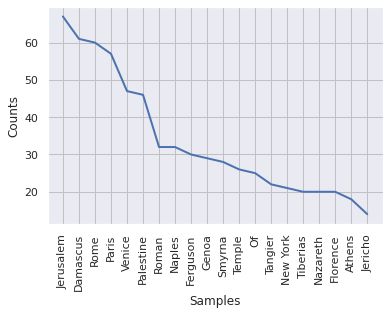

In [23]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns # used to set the style of the figures

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(cities)
freqdist1.plot(20) #running this w/out an argument plots all words! Here, we're specifying the top 20

## Creating a Folium Map of our Data

In [24]:
#import required libraries, packages, etc.
import folium
from folium import plugins
import json

In [52]:
# Converting geopandas dataframe to geojson so it can be plotted on a web map with folium.
geo_df['geometry'].to_file("TwainCities.geojson", driver='GeoJSON')

# initialize the map at a global scale with a point midaway between U.S. and Europe as the center.
TwainMap = folium.Map(location=[32.826919, -41.225228], tiles='Stamen Terrain', zoom_start=2)

folium.GeoJson("TwainCities.geojson").add_to(TwainMap)

# Display your map   
TwainMap

# Coding Challenge

In [49]:
def footprint(url, osm_account, basemap_url):
  # This function is going to show a map about the spatial footprints and the plot of frequency
  ## read the file
  response = request.urlopen(url)
  raw = response.read().decode('utf8')
  ## find the name in the text
  places = GeoText(raw)
  cities = list(places.cities)
  geolocator = Nominatim(user_agent=osm_account, timeout=2) # requires your e-mail address to track usage. Timeout set for 2 seconds.
  lat_lon = []
  for city in cities:
    try:
      location = geolocator.geocode(city)
      if location:
        # If you want to see only lat/lon as they process you can include the following code here but I found it added a lot of time to the operation: print(location.latitude, location.longitude)
        lat_lon.append(location)
    except GeocoderTimedOut as e:
      print("Error: geocode failed on input %s with message %s">
            (city, e))
  # save it as the panda dataframe
  df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
  # convert the longitude and latitude to Point class
  geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
  # coordinate system we're using
  crs = {'init': 'epsg:4326'}
  # convert df to geo df
  geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
  # Figures inline and set visualization style
  %matplotlib inline
  sns.set()
  # world map .shp file we down/uploaded
  countries_map = gpd.read_file(basemap_url)
  f, ax = plt.subplots(figsize=(16, 16))
  plt.title("Spatial footprints map")
  countries_map.plot(ax=ax, alpha=0.4, color='grey')
  geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'r', marker = '^', alpha=.4)
  # Create freq dist and plot
  f, ax = plt.subplots()
  freqdist1 = nltk.FreqDist(cities)
  plt.title('Word frequency distribution')
  freqdist1.plot(20) #running this w/out an argument plots all words! Here, we're specifying the top 20 geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'r', marker = '^', alpha=.4)



/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


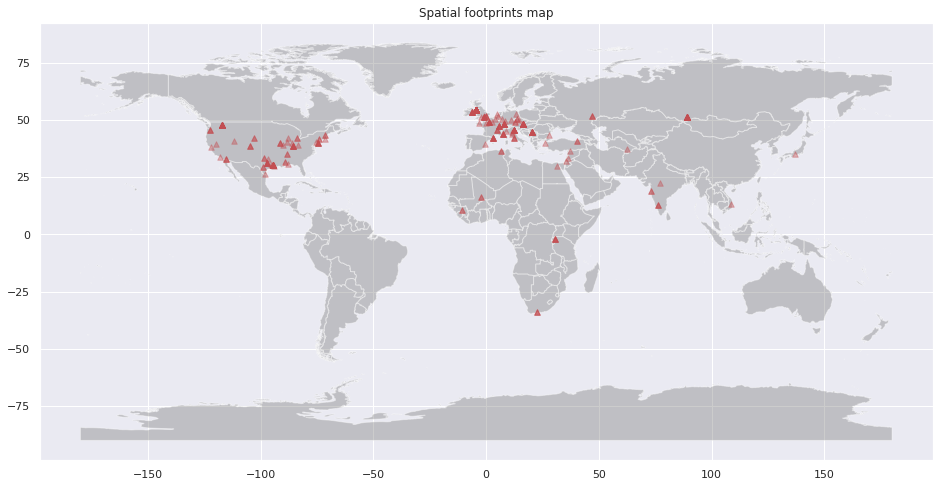

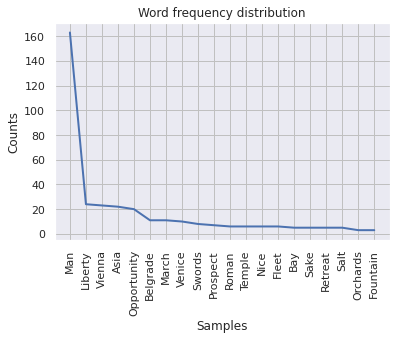

In [51]:
## the book name is Travels into Turkey. It should have many places in the book.
book_url = 'https://www.gutenberg.org/files/65414/65414-0.txt'
footprint(book_url, "zhenliu26@outlook.com", 'Countries_WGS84.shp')